# K-nearest-neighbour algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('gene_expression_ml.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.shape

(3000, 3)

# Explorative Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='Gene One', ylabel='Gene Two'>

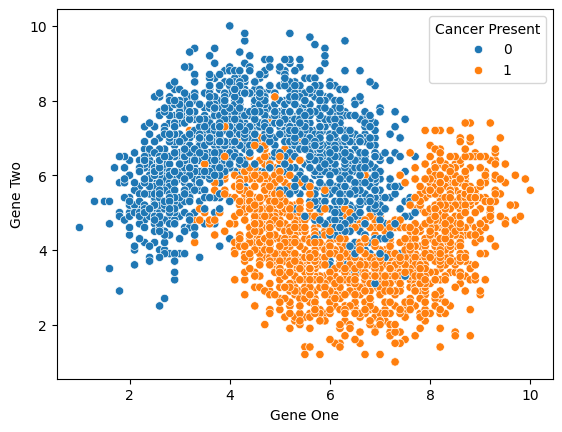

In [7]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

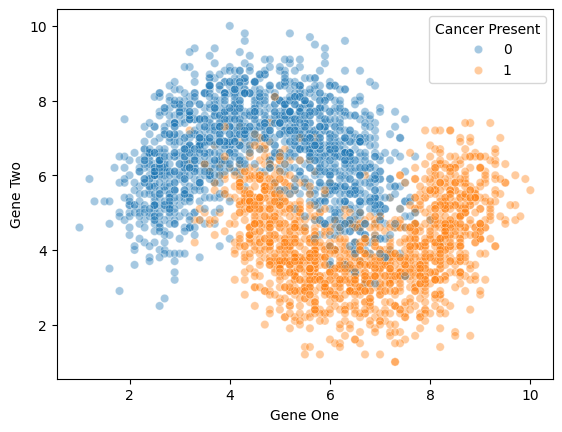

In [8]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.4)

(3.0, 9.5)

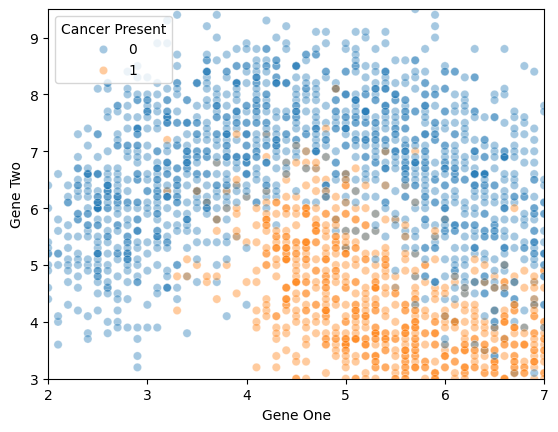

In [9]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.4)
plt.xlim(2,7)
plt.ylim(3,9.5)

# Train | Test split and Scaling of data

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)



In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)


StandardScaler()

In [12]:
sc_X_train = scaler.transform(X_train)
sc_X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model_fit = knn_model.fit(sc_X_train, y_train)

# Model Evaluation

In [16]:
y_pred = knn_model_fit.predict(sc_X_test)

In [17]:
knn_model.predict_proba(sc_X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
accuracy_score(y_test, y_pred)

0.9033333333333333

In [20]:
confusion_matrix(y_test, y_pred)

array([[407,  45],
       [ 42, 406]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       452
           1       0.90      0.91      0.90       448

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



# Elbow method for choosing the best K value

In [22]:
test_error_rate = []

for k in range(1, 30):
    knn_model1 = KNeighborsClassifier(n_neighbors=k)
    knn_model1.fit(sc_X_train, y_train)

    y_pred_k = knn_model1.predict(sc_X_test)

    test_error1 = 1 - accuracy_score(y_test, y_pred_k)
    test_error_rate.append(test_error1)

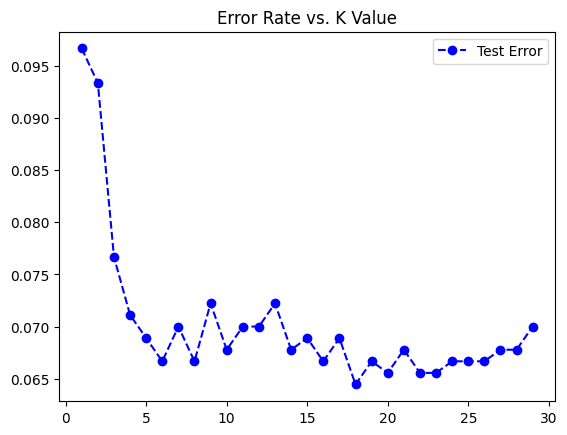

In [23]:
plt.figure()
plt.plot(range(1, 30), test_error_rate, color='blue', linestyle='dashed', marker='o',)
plt.title('Error Rate vs. K Value')
plt.legend(['Test Error'])
plt.show()

# Cross-Validation Grid Search

In [24]:
scaler  = StandardScaler()

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [27]:
opertions = [('scaler', scaler), ('knn', knn)]

In [28]:
from sklearn.pipeline import Pipeline


In [29]:
pipe = Pipeline(opertions)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
k_values = list(range(1, 30))

In [35]:
param_grid = {'knn__n_neighbors': k_values}

In [36]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [37]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [39]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.91047619, 0.90571429, 0.92285714, 0.91809524, 0.92428571,
       0.92333333, 0.92809524, 0.92380952, 0.93      , 0.92857143,
       0.93142857, 0.93      , 0.93190476, 0.93190476, 0.93190476,
       0.93380952, 0.9347619 , 0.93571429, 0.93666667, 0.93619048,
       0.93571429, 0.9352381 , 0.93619048, 0.93619048, 0.93761905,
       0.93428571, 0.9347619 , 0.9352381 , 0.93619048])

In [38]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=25))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=25),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 25,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
knn25 = KNeighborsClassifier(n_neighbors=25)
operations = [('scaler',scaler),('knn25',knn25)]

In [41]:
pipe = Pipeline(operations)

In [42]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn25', KNeighborsClassifier(n_neighbors=25))])

In [43]:
y_pred_25 = pipe.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred_25))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       452
           1       0.92      0.95      0.93       448

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [45]:
pipe.predict([[3.2,9.6]])

c:\Users\kaps1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)